# Test data science

##Importation des librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel("C:/Users/KOUADIO Christiane/Documents/Traitement_données/donnees_sncf.xlsx")

In [3]:
# lire l'entête du data frame
df.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,2019-01-14,800,854,82,BOIS-COLOMBES,72179.0,IMAGINE R,907
1,2019-01-14,800,854,82,BOIS-COLOMBES,72179.0,TST,233
2,2019-01-14,800,854,831,SAINT-NOM-LA-BRETECHE-FORET-DE-MARLY,64382.0,AMETHYSTE,4
3,2019-01-14,800,854,831,SAINT-NOM-LA-BRETECHE-FORET-DE-MARLY,64382.0,NAVIGO,536
4,2019-01-14,800,854,831,SAINT-NOM-LA-BRETECHE-FORET-DE-MARLY,64382.0,TST,9


In [4]:
# faire le point sur les variables et les observations
df.shape

(940549, 8)

In [5]:
# Description des variables numériques
df.describe()

,CODE_STIF_TRNS,ID_REFA_LDA,NB_VALD
count,940549.000000,928344.000000,940549.000000
mean,487.402443,71760.276284,1042.398621
std,349.303902,29543.625366,4039.458158
min,100.000000,59403.000000,4.000000
25%,100.000000,66659.000000,12.000000
50%,800.000000,71144.000000,109.000000
75%,800.000000,71756.000000,529.000000
max,810.000000,415852.000000,130809.000000


In [6]:
#Supprimer certaines variables de notre data frame
df1=df.drop(columns=['JOUR','ID_REFA_LDA','CODE_STIF_TRNS','CODE_STIF_RES','CODE_STIF_ARRET','CATEGORIE_TITRE'])

In [7]:
df1.head

<bound method NDFrame.head of                                LIBELLE_ARRET  NB_VALD
0                              BOIS-COLOMBES      907
1                              BOIS-COLOMBES      233
2       SAINT-NOM-LA-BRETECHE-FORET-DE-MARLY        4
3       SAINT-NOM-LA-BRETECHE-FORET-DE-MARLY      536
4       SAINT-NOM-LA-BRETECHE-FORET-DE-MARLY        9
...                                      ...      ...
940544                      LA TOUR MAUBOURG       16
940545                      LA TOUR MAUBOURG      999
940546                              LAUMIERE       75
940547                              LAUMIERE        4
940548                              LAUMIERE      632

[940549 rows x 2 columns]>

#### Q1) Les 20 premiers arrêts en terme de validation

In [8]:
# regrouper la somme du nombre de validation par arrêt
dq=df1.groupby(['LIBELLE_ARRET']).sum()
#Ranger par ordre décroissant le nombre de valisation par arrêt
dqq=dq.sort_values(by = 'NB_VALD', ascending = False)[0:20]
#indexer mon nouveau dataframe pour avoir un bon, mieux présenté
dqq.reset_index(0, inplace=True)
print(dqq)

                       LIBELLE_ARRET   NB_VALD
0            LA DEFENSE-GRANDE ARCHE  31142290
1                       GARE DU NORD  28680379
2                       GARE DE LYON  27034653
3                CHATELET-LES HALLES  22227016
4                       SAINT-LAZARE  17780830
5                       MONTPARNASSE  15635869
6                             NATION  13806030
7                      GARE DE L'EST  13518664
8           CHARLES DE GAULLE ETOILE  10730798
9                              AUBER  10419879
10  BIBLIOTHEQUE FRANCOIS MITTERRAND  10199704
11                 DENFERT-ROCHEREAU   8476819
12            HAUSSMANN-SAINT-LAZARE   7442626
13                        REPUBLIQUE   7147580
14                        LES HALLES   6897957
15                       LA CHAPELLE   6459788
16                        AUSTERLITZ   6256202
17                       SAINT-DENIS   5173856
18                          BASTILLE   5003608
19           SAINT-MICHEL NOTRE DAME   4904789


#### Q2) Une illustraion graphique de ce classement

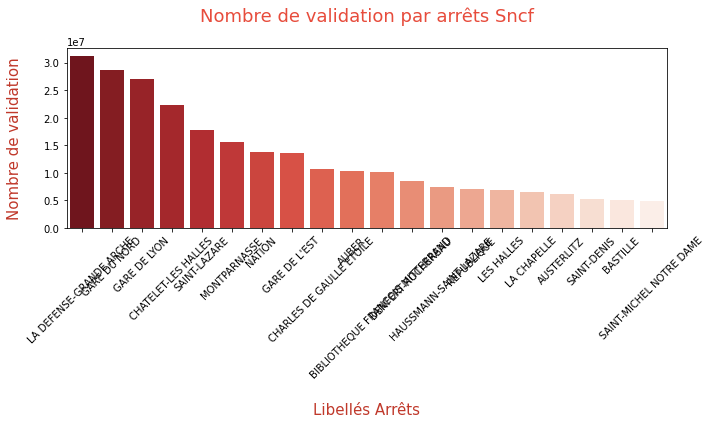

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=dqq['LIBELLE_ARRET'], y=dqq['NB_VALD'], palette="Reds_r")
plt.xlabel('\nLibellés Arrêts', fontsize=15, color='#c0392b')
plt.ylabel("Nombre de validation\n", fontsize=15, color='#c0392b')
plt.title("Nombre de validation par arrêts Sncf\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()